<a href="https://colab.research.google.com/github/zsx711/AIPI-590/blob/main/notebook/AIPI_590_Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #04


This assignment includes the demonstration for three of chosen algorithms from imodels library and the explanation of three methods via visuals. Here I choose the RuleFit model, the HSTree model, and the Bayesian Rule List model. I used ChatGPT and class material [imodels/readme.md](https://github.com/csinva/imodels/blob/72831737825ca47985e66c5ce6ba096a362b2ea0/readme.md) as guidance.

Shunxin Zhang

Notebook:https://colab.research.google.com/github/zsx711/AIPI-590/blob/main/notebook/AIPI_590_Assignment04.ipynb [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zsx711/AIPI-590/blob/main/notebook/AIPI_590_Assignment04.ipynb)

# Implementation of the RuleFit model, the HSTree model, and the Bayesian Rule List model from imodels library.

In [1]:
pip install imodels==1.4.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 6.0 MB/s eta 0:00:00


In [4]:
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import KBinsDiscretizer
from imodels import RuleFitClassifier, HSTreeClassifierCV, BayesianRuleListClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Check if the repository already exists, and remove it if so
repo_name = "AIPI-590"
if os.path.exists(repo_name):
    !rm -rf {repo_name}  # Remove the existing directory

# Clone GitHub repository (AIPI-590)
repo_name = "AIPI-590"
git_path = 'https://github.com/zsx711/AIPI-590.git'
!git clone "{git_path}"

# Change the working directory to 'notebook' inside your repo
notebook_dir = 'notebook'
path_to_notebook = os.path.join(repo_name, notebook_dir)
%cd "{path_to_notebook}"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'AIPI-590'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 78 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 2.60 MiB | 8.23 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/content/AIPI-590/notebook


In [6]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# 1. Fit and Print Structure for RuleFitClassifier
rulefit_model = RuleFitClassifier()  # initialize RuleFit
rulefit_model.fit(X_train, y_train)  # fit the model
rulefit_preds = rulefit_model.predict(X_test)  # make predictions
rulefit_accuracy = accuracy_score(y_test, rulefit_preds)  # calculate accuracy

print("RuleFit Model Structure:")
print(rulefit_model)  # this will print the rules generated by RuleFit
print(f"RuleFit Accuracy: {rulefit_accuracy:.4f}\n")

# 2. Fit and Print Structure for HSTreeClassifierCV
hstree_model = HSTreeClassifierCV(max_leaf_nodes=4)  # initialize HSTree with max 4 leaf nodes
hstree_model.fit(X_train, y_train)  # fit the model
hstree_preds = hstree_model.predict(X_test)  # make predictions
hstree_accuracy = accuracy_score(y_test, hstree_preds)  # calculate accuracy

print("HSTreeClassifierCV Model Structure:")
print(hstree_model)  # print the decision tree structure
print(f"HSTree Accuracy: {hstree_accuracy:.4f}\n")

# 3. Fit and Print Structure for BayesianRuleListClassifier
# Discretize continuous features for the Bayesian Rule List model
discretizer = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform')
X_train_discretized = discretizer.fit_transform(X_train).toarray()  # Convert to dense
X_test_discretized = discretizer.transform(X_test).toarray()        # Convert to dense

bayesian_rule_model = BayesianRuleListClassifier()  # initialize Bayesian Rule List
bayesian_rule_model.fit(X_train_discretized, y_train)  # fit the model on discretized data
bayesian_rule_preds = bayesian_rule_model.predict(X_test_discretized)  # make predictions
bayesian_rule_accuracy = accuracy_score(y_test, bayesian_rule_preds)  # calculate accuracy

print("Bayesian Rule List Model Structure:")
print(bayesian_rule_model)  # print the Bayesian rule list structure
print(f"Bayesian Rule List Accuracy: {bayesian_rule_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFit Model Structure:
> ------------------------------
> RuleFit:
> 	Predictions are made by summing the coefficients of each rule
> ------------------------------
                                                                                              rule   coef
                                                                                               X15   3.22
                                                                                               X19 143.39
                                                                                               X21  -0.02
                                                                                               X24  -8.21
                                                                                    X27 <= 0.13165   0.05
                                                X13 <= 35.855 and X22 <= 117.45 and X27 <= 0.16125   0.04
                                                                  X10 <= 0.62555 and X7 <= 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: T

Bayesian Rule List Model Structure:
Trained RuleListClassifier 
IF X_138 > 0.5 THEN probability of class 1: 1.4% (0.0%-5.2%)
ELSE IF X_35 > 0.5 and X_86 > 0.5 THEN probability of class 1: 95.5% (89.3%-99.0%)
ELSE IF X_115 > 0.5 and X_130 > 0.5 THEN probability of class 1: 99.2% (97.1%-100.0%)
ELSE IF X_105 > 0.5 and X_50 > 0.5 THEN probability of class 1: 94.7% (81.5%-99.9%)
ELSE IF X_100 > 0.5 THEN probability of class 1: 90.6% (78.6%-98.0%)
ELSE IF X_106 > 0.5 and X_11 > 0.5 THEN probability of class 1: 80.0% (60.4%-93.9%)
ELSE probability of class 1: 2.6% (0.3%-7.1%)

Bayesian Rule List Accuracy: 0.9123


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Visuals that provid explanations of three methods.

RuleFit Model Block Diagram

1. Input Features: These are the variables from the dataset (e.g., X15, X19, etc.) that the model uses to make decisions.

2. Rules: Each rule checks if specific conditions based on the input features are met. If a rule is triggered, it contributes a coefficient (positive or negative) to the final prediction.

3. Sum of Rule Coefficients: The model adds up all the coefficients from the rules that were triggered to calculate the final score.

4. Predicted Output: This is the final prediction generated by the model after summing the rule coefficients, which can be a classification or probability.


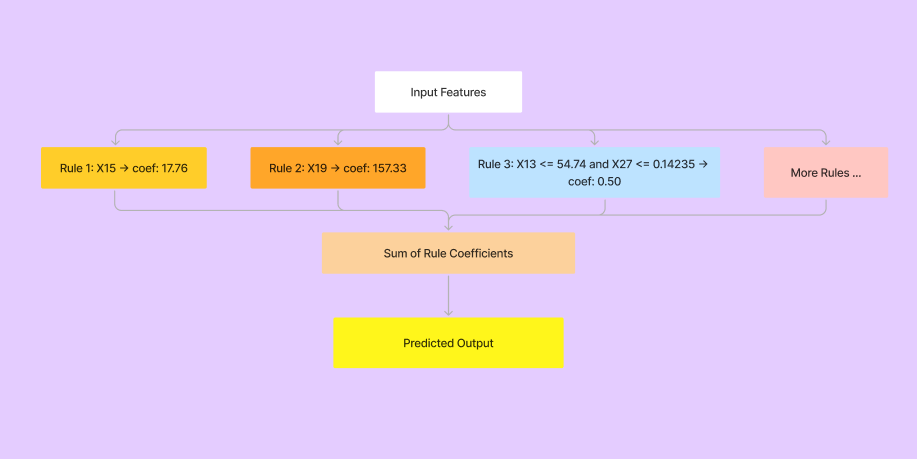

HSTree Block Diagram

1. Input Features: The model begins with the input features, which are variables like X7, X20, and X21 from the dataset.

2. Decision Splits: The model makes decisions by splitting the data based on feature thresholds, such as X7 <= 0.05. Each decision narrows down the possible outcomes.

3. Leaf Nodes: At the end of each decision path, the model reaches a leaf node that assigns a class (e.g., 0 or 1) along with the probabilities for each class.

4. Predicted Output: The final class prediction is made based on the decision path taken through the tree, using the probabilities from the leaf nodes.

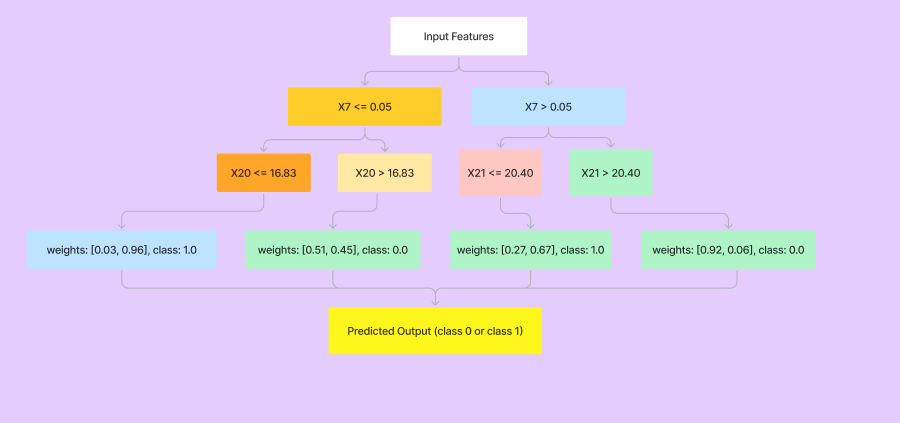

Bayesian Rule List Model block diagram

1. Input Features: The model starts with input data (features like X_138, X_35, etc.) to evaluate the rules.

2. Rules: Each rule checks if specific conditions (e.g., X_138 > 0.5) are met. If true, the model assigns a probability for class 1 based on that rule.

3. Final Probabilities: Once a rule is satisfied, the model predicts the probability for class 1. If none of the rules apply, the "Else" condition gives the final probability.

4. Predicted Probability: The final output is the predicted probability for class 1, based on the first rule that is triggered.

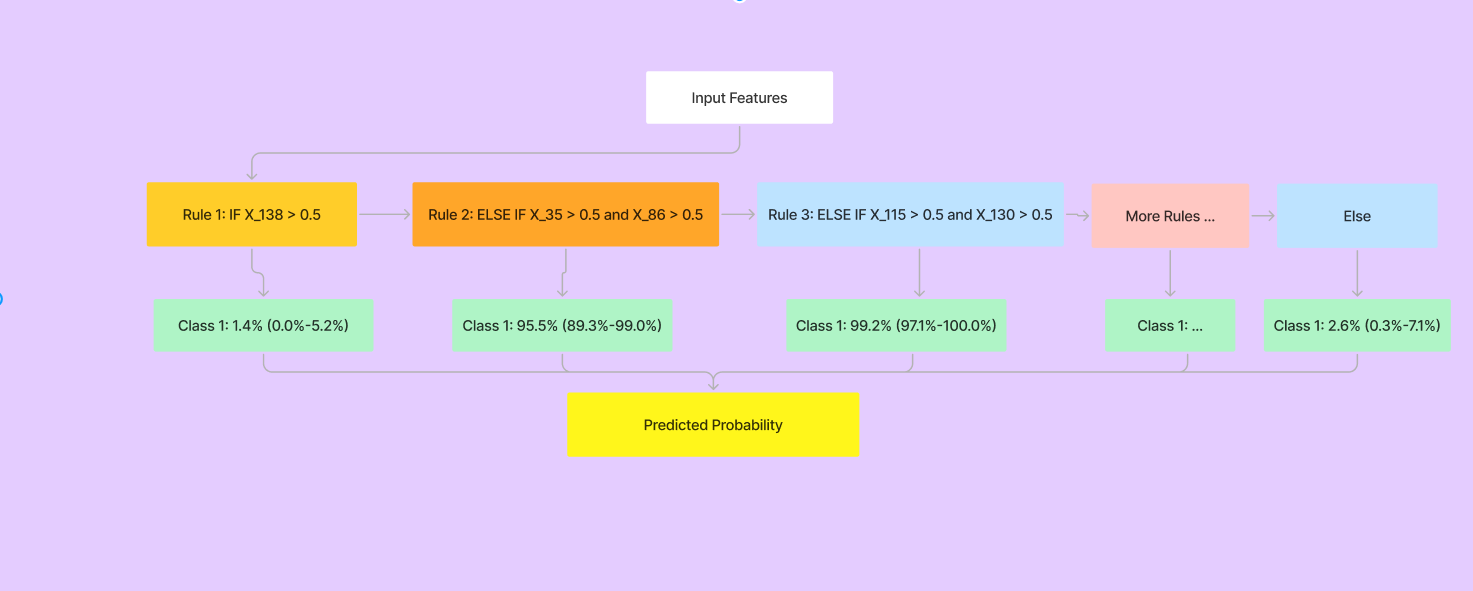